In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

/home/om/anaconda3/envs/masters/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/om/anaconda3/envs/masters/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [30]:
data = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month')
data.columns = ['Passengers']

In [191]:
TRAIN_SIZE = 120
data_train = data.iloc[:TRAIN_SIZE]
data_test = data.iloc[TRAIN_SIZE:data.size]
x_train = np.array(range(TRAIN_SIZE))
x_test = np.array(range(TRAIN_SIZE, data.size))


In [146]:
#Variante para ver problema de extrapolación del arbol, ponemos el test en medio
"""TRAIN_SIZE = 40
data_train = data.iloc[:TRAIN_SIZE]
data_train = data_train.append(data.iloc[-TRAIN_SIZE:])
data_test = data.iloc[40:104]
x = np.array(range(data.size))
x_train = np.array([x[:TRAIN_SIZE]]+ [x[-TRAIN_SIZE:]]).reshape(-1)
x_test = np.array(range(40, 104))"""

In [192]:
a = [np.array(range(1,3))]
a.extend([np.array(range(4,6))])
#a =np.array(a).reshape(-1)

In [190]:
a

[array([1, 2]), array([4, 5])]

In [193]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 40)
model_fit = model.fit(x_train.reshape(-1,1), data_train)
predicted_ytrain = model_fit.predict(x_train.reshape(-1,1))
predicted_ytest = model_fit.predict(x_test.reshape(-1,1))


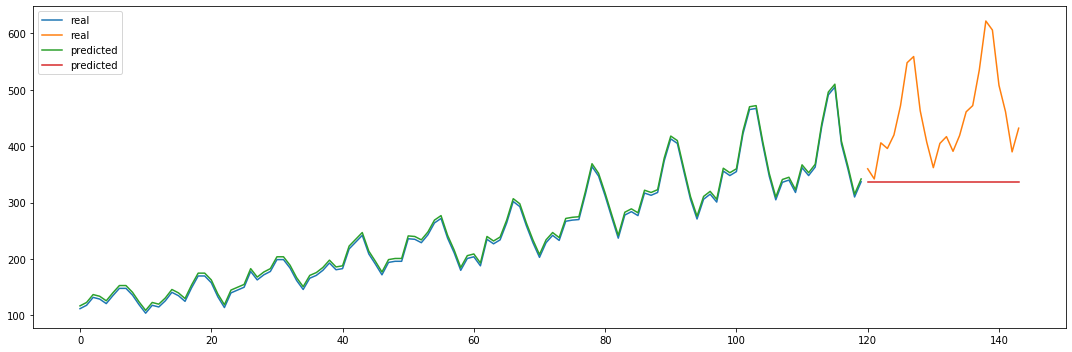

In [194]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x_train, data_train, label='real')
ax.plot(x_test, data_test, label = 'real')
ax.plot(x_train, predicted_ytrain + 5, label = 'predicted')
ax.plot(x_test, predicted_ytest, label = 'predicted')
plt.legend()
plt.tight_layout()

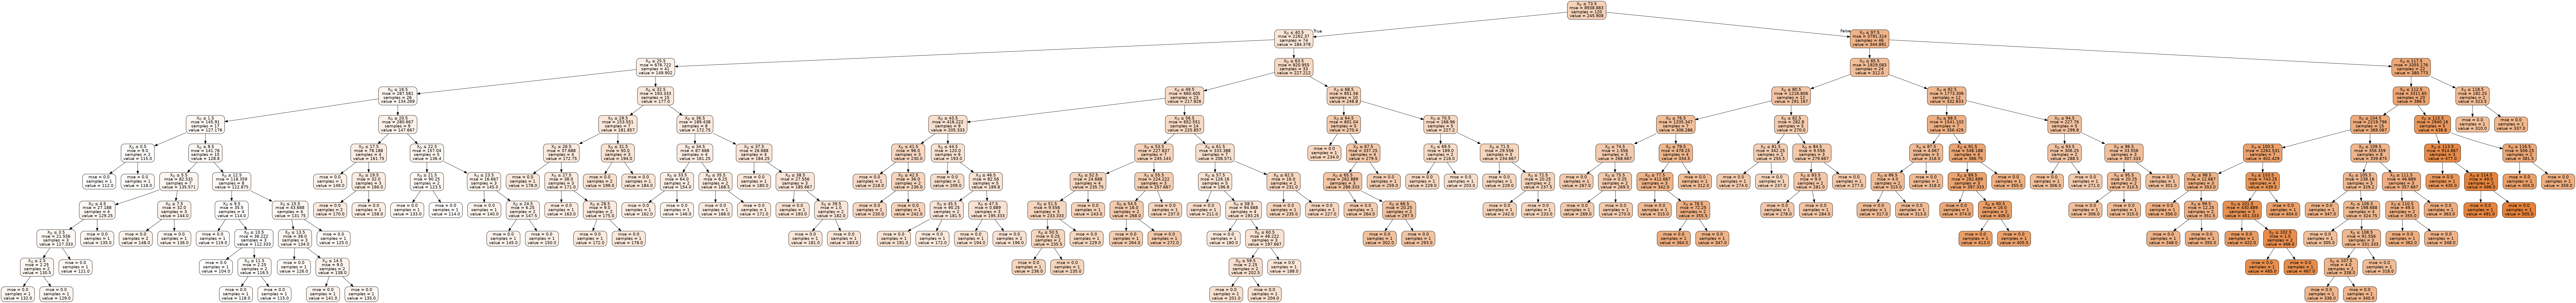

In [195]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [197]:
from sklearn import ensemble

/home/om/anaconda3/envs/masters/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [201]:
model_rf = ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 20)
fit_rf = model_rf.fit(x_train.reshape(-1, 1), data_train)
predict_rf = fit_rf.predict(x_test.reshape(-1,1))

/home/om/anaconda3/envs/masters/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


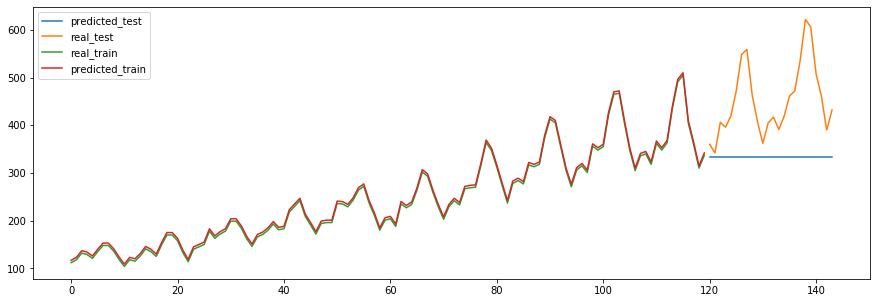

In [204]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x_test, predict_rf, label='predicted_test')
ax.plot(x_test, data_test, label='real_test')
ax.plot(x_train, data_train, label='real_train')
ax.plot(x_train, predicted_ytrain + 5, label = 'predicted_train')
plt.legend()


In [ ]:
#AÑADIR FEATURES

In [205]:
x_train_month = np.hstack((x_train.reshape(-1,1), np.array(list(range(12)) * 10).reshape(-1,1)))
x_test_month = np.hstack((x_test.reshape(-1,1), np.array(list(range(12)) * 2).reshape(-1,1)))

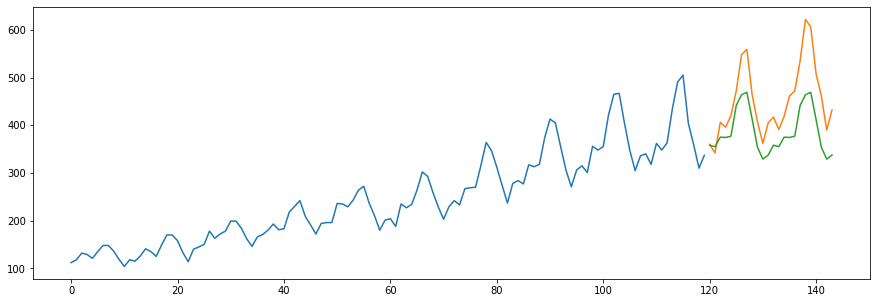

In [208]:
rf_model = ensemble.RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(x_train_month, data_train.squeeze())
y_pred_rf = rf_model.predict(x_test_month)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, data_train)
ax.plot(x_test, data_test, label='Real')
ax.plot(x_test, y_pred_rf, label='Prediction')

In [265]:
#12 meses es un año, genero vector de información [1 (12 veces), 2 ( 12 veces) ....] Tenemos 10 años
# de train y 2 años de test

vec = np.array(list(range(10)))
vec2 = np.array(list(range(10, 12)))
a = np.array(list([np.tile(i, 12) for i in vec])).reshape(-1, 1)
b = np.array(list([np.tile(i, 12) for i in vec2])).reshape(-1, 1)
x_train_month_year = np.hstack((x_train_month, a))
x_test_month_year = np.hstack((x_test_month, b))

In [267]:
model = ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 20)
fit_rf2 =model.fit(x_train_month_year, data_train)
y_pred_rf2 = fit_rf2.predict(x_test_month_year)

/home/om/anaconda3/envs/masters/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


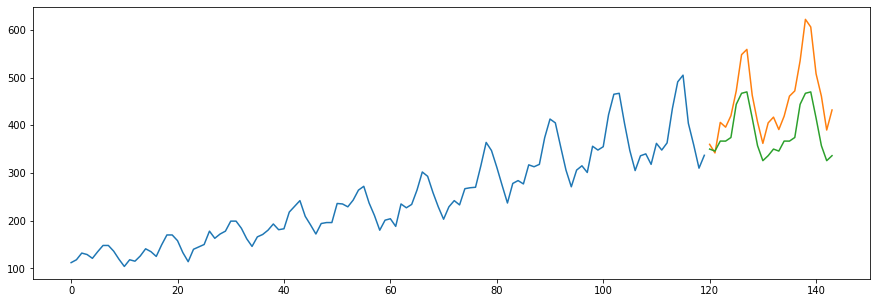

In [268]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, data_train)
ax.plot(x_test, data_test, label='Real')
ax.plot(x_test, y_pred_rf2, label='Prediction')

In [269]:
x_train_month_year = np.hstack((x_train_month, np.repeat(list(range(10)), 12).reshape(-1,1)))
x_test_month_year = np.hstack((x_test_month, np.repeat(list(range(10,12)), 12).reshape(-1,1)))

In [279]:
np.repeat(list(range(3)), 10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [311]:
# Tengo la idea de encontrar los maximos y pasarselos constante para cada año y luego le pasaré 
# el average moving ewm().mean()
maxs_years_train = list()
maxs_years_test = list()
for i in range(10):
    maxi = np.max(data_train.iloc[12*i:12 + 12*i]).squeeze()
    maxs_years_train.append(maxi)
for i in range(2):
    maxi2 = np.max(data_test.iloc[12*i:12 + 12*i]).squeeze()
    maxs_years_test.append(maxi2)


In [312]:
maxs_years_test

[559, 622]

In [313]:
x_train_month_year2 = np.hstack((x_train_month, np.repeat(maxs_years_train, 12).reshape(-1,1)))
x_test_month_year2 = np.hstack((x_test_month, np.repeat(maxs_years_test, 12).reshape(-1,1)))

In [315]:
model3 = ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 20)
fit_rf3 =model3.fit(x_train_month_year2, data_train)
y_pred_rf3 = fit_rf3.predict(x_test_month_year2)

/home/om/anaconda3/envs/masters/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


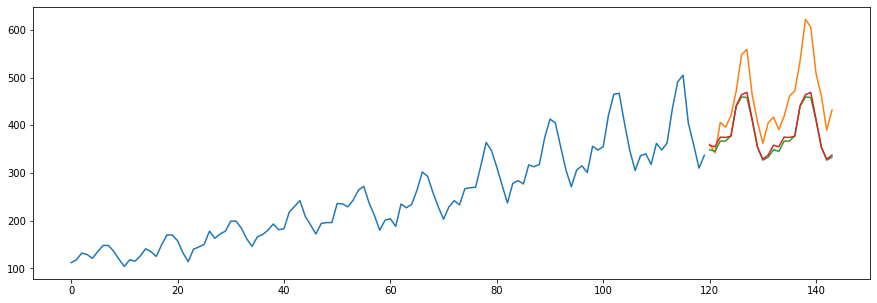

In [321]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, data_train)
ax.plot(x_test, data_test, label='Real')
ax.plot(x_test, y_pred_rf3, label='Prediction')
ax.plot(x_test, y_pred_rf, label='Prediction')

#Vemos que ponerle los maximos no es buena idea

In [280]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


In [320]:
print('mse de RF = ', mse(data_test, predict_rf))
print('mse de RF_month = ', mse(data_test, y_pred_rf))
print('mse de RF_month_year = ',mse(data_test, y_pred_rf2))
print('mse de RF_month_year_maxs = ',mse(data_test, y_pred_rf3), '\n')

print('mae de RF = ', mae(data_test, predict_rf))
print('mae de RF_month = ', mae(data_test, y_pred_rf))
print('mae de RF_month_year = ',mae(data_test, y_pred_rf2))
print('mse de RF_month_year_maxs = ',mae(data_test, y_pred_rf3), '\n')

mse de RF =  19460.596399999995
mse de RF_month =  5819.091125
mse de RF_month_year =  5912.002108333333
mse de RF_month_year_maxs =  6453.584191666666 

mae de RF =  117.82999999999998
mae de RF_month =  66.12916666666666
mae de RF_month_year =  67.65916666666666
mse de RF_month_year_maxs =  70.32416666666667 



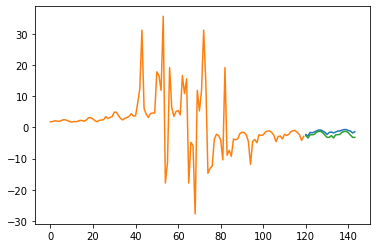

In [346]:
#Transformacion aplicada a la serie 
fig, ax = plt.subplots()
ax.plot(x_test, 1/(1-(data_test.squeeze().values)/250))
ax.plot(x_train, 1/(1-(data_train.squeeze().values)/250))
ax.plot(x_test, y_pred_prueba_noconv)

In [344]:
x_train = np.array(range(TRAIN_SIZE))
x_test = np.array(range(TRAIN_SIZE, data.size))
data_train_prueba = 1/(1-(data_train)/250)
x_train_month = np.hstack((x_train.reshape(-1,1), np.array(list(range(12)) * 10).reshape(-1,1)))
x_test_month = np.hstack((x_test.reshape(-1,1), np.array(list(range(12)) * 2).reshape(-1,1)))

model_prueba = ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 20)
fit_rf3 =model3.fit(x_train_month.reshape(-1,2), data_train_prueba)
y_pred_prueba_noconv = fit_rf3.predict(x_test_month.reshape(-1,2))

/home/om/anaconda3/envs/masters/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [345]:
y_pred_prueba = 250 * (1- 1/ y_pred_prueba_noconv)

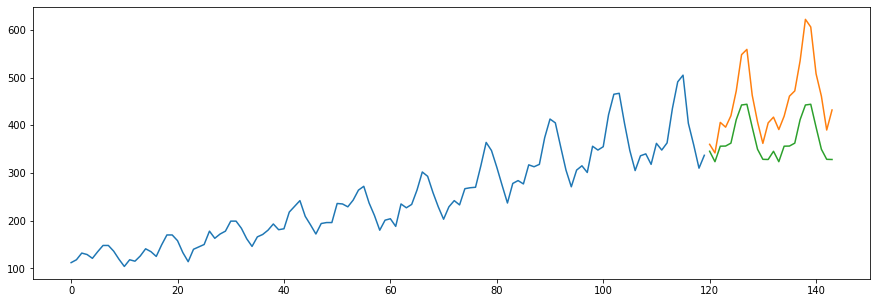

In [347]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, data_train)
ax.plot(x_test, data_test, label='Real')
ax.plot(x_test, y_pred_prueba, label='Prediction')



In [ ]:
# Gradient Boosting 
